# Trabajo práctico 1 



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

PATH_DATASET = "./UCI HAR Dataset/train"
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

def standardize_data(arr):
    rows, columns = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(arr[:,column])
        std = np.std(arr[:,column])
        tempArray = np.empty(0)
        
        for element in arr[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

X = standardize_data(X_train)

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)


In [2]:
X.shape

(7352, 561)

In [3]:
covariance_matrix = np.cov(X.T)

In [4]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


In [5]:
idx = eigen_values.argsort()[::-1]   
eigenValues_order = eigen_values[idx]
eigenVectors_order = eigen_vectors[:,idx]


#poner los 64 eigenvalores
projection_matrix = (eigenVectors_order.T[:][:64]).T



X_pca = X.dot(projection_matrix)

print(X_pca.shape)

#ahora en vez de 561 tengo 64 componentes




(7352, 64)


c:\Users\Esgoty\anaconda3\envs\FIUBA001\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


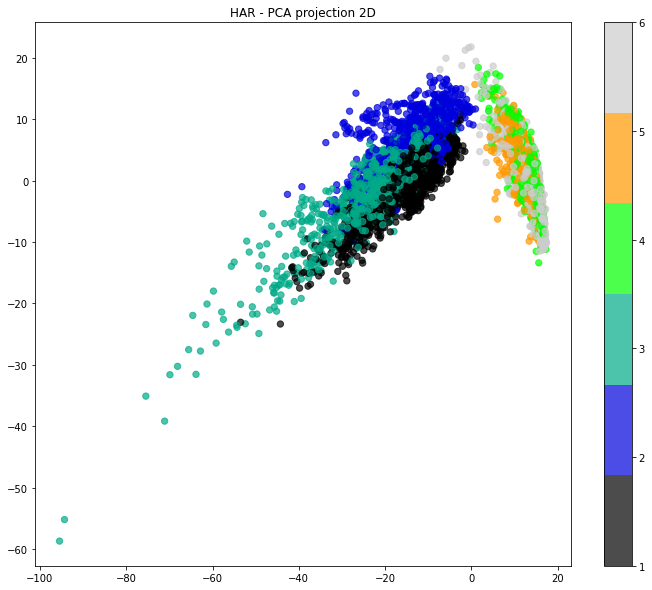

In [6]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('HAR - PCA projection 2D');

## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

In [7]:
np.random.seed(0)

# funcion para elegir como centroides iniciales k puntos originales del dataset
#los centroides tienen la misma cantidad de features que un punto del dataset. 
def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]


#genero una funcion que mida la distancia de cada vector del dataset, a cada uno de los k centroides. 
#para calcular la diferencia de cada vector del dataset a los k centroides de una sola vez y evitar 
# for raros uso broadcasting. en donde lo que hago es una nueva matriz de centroides, con la misma 
# cantidad de filas que el data set original, pero con k elementos por fila, siendo cada elemento 
# la "posicion" de cada k centroide.
#luego aplico norma 2 al


def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)



# el proximo paso es mover la "posicion" de cada centroide a la media de los puntos que fueron 
# etiquetados para ese centroide. 
# esta operacion move debe darme un nuevo array con las nuevas posciones de k centroides

def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])


# y luego debo repetir esas operaciones una cantidad de veces que me gusten o que haya analizado que hacen
#que la variacion de las posiciones sean menores que cierta cantidad. 
# como es muy viaje eso, voy a definir 50  iteraciones 






## Para k=2

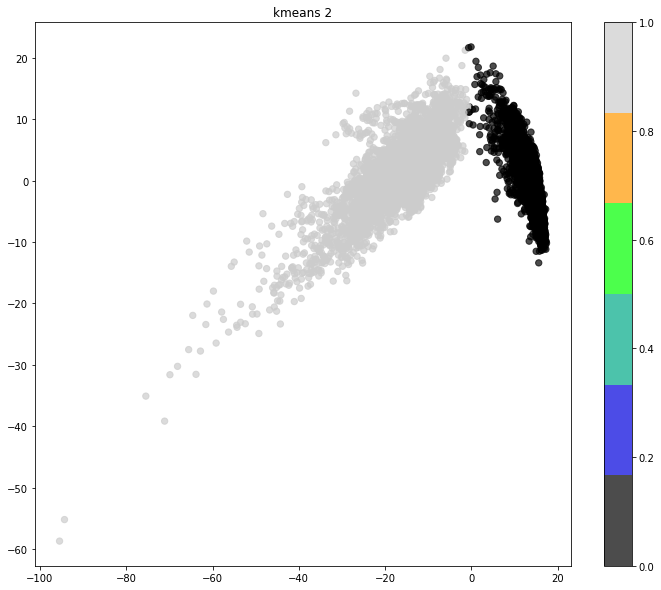

In [49]:
np.random.seed(0)
k2=2
data_kmean2=X_pca

labels_kmeans2= np.zeros(data_kmean2.shape[0])

#valor inicial de centroides
centroid_k2 = initialize_centroids(data_kmean2,k2)


for iteracion in range(50):
    labels_kmeans2=closest_centroid(data_kmean2,centroid_k2)
    centroid_k2=move_centroids(data_kmean2,labels_kmeans2,centroid_k2)



# se termino la historia, ahora a plotear

# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(data_kmean2[:, 0], data_kmean2[:, 1], c=labels_kmeans2, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('kmeans 2');

    


## lo mismo pero para k=6

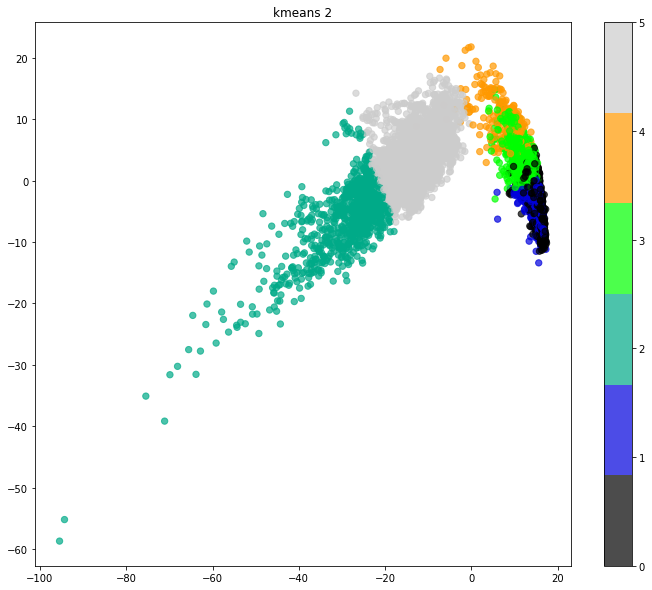

In [54]:
np.random.seed(0)
k6=6
data_kmean6=X_pca

labels_kmeans6= np.zeros(data_kmean6.shape[0])

#valor inicial de centroides
centroid_k6 = initialize_centroids(data_kmean6,k6)


for iteracion in range(50):
    labels_kmeans6=closest_centroid(data_kmean6,centroid_k6)
    centroid_k6=move_centroids(data_kmean6,labels_kmeans6,centroid_k6)



# se termino la historia, ahora a plotear

# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(data_kmean6[:, 0], data_kmean6[:, 1], c=labels_kmeans6, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('kmeans 2');

## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

pca me dio identico, pero girado, nico comento que esta bien que este girado, que la cuestion estaba en como sklearn daba los numeros. 

para kmeans se vio que si no le pongo el mismo seed para el random los centroides tienden a 
distintos valores, lo que clasifica a cada punto del dataset en ligeramente distintos clusters.



## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [55]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
RANDOM_STATE = 17

In [56]:
from sklearn.datasets import fetch_openml
Xminst, yminst = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


In [57]:
print(Xminst.shape)
print(yminst.shape)

(70000, 784)
(70000,)


In [58]:
scaler = StandardScaler()
X_minstscaled = scaler.fit_transform(Xminst)

In [59]:
pcaminst = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_minstscaled)
X_pcaminst = pcaminst.transform(X_minstscaled)
X_pcaminst.shape

(70000, 238)

In [60]:
kmeansminst = KMeans(n_clusters=10, n_init=50, random_state=RANDOM_STATE)
kmeansminst.fit(X_pcaminst)
cluster_labels = kmeansminst.labels_

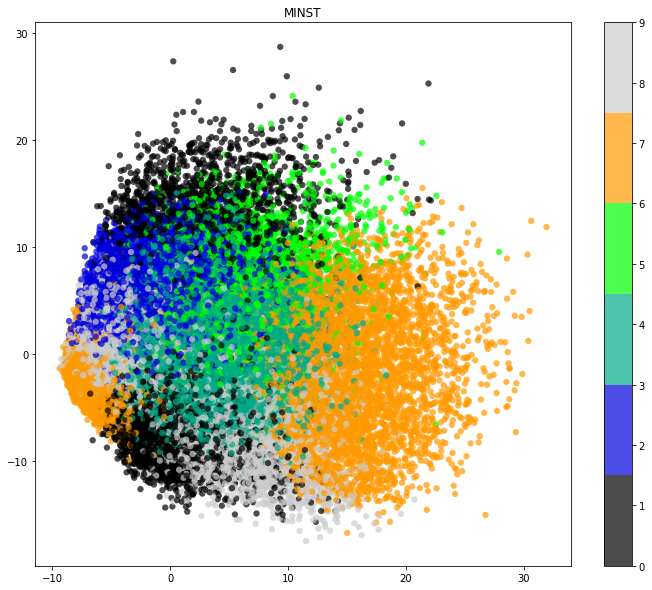

In [61]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.scatter(X_pcaminst[:, 0], X_pcaminst[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MINST');

Se puede observar que en para un determinada area de dibujo los puntos parecen pertenecer al menos a 3 clusteres


esto es consitente a que PCA pudo descartar 2/3 de la cantidad de dimensiones originales, pero sin embargo estas dimensiones tienen pesos al momento de calcular los centroides, pero cuando se plotean las dos primeras dimensiones parece que hay puntos de estas primeras dos features que en una misma area de dibujo parecen pertenecer al menos a 3 clusteres! 




